# **Data Visualization and Narratives**
## Apple Stock Price Visualization

**Apple Inc. is an American multinational technology company headquartered in Cupertino, California, in Silicon Valley. It designs, develops, and sells consumer electronics, computer software, and online services.**

### **Import necessary libraries and frameworks**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os

In [3]:
# def process_batch(batch_data):
#     processed_data = batch_data.apply(lambda x: x * 2) 
#     return processed_data

In [4]:
# chunk_size = 100000
# csv_file = 'aapl_2014_2023.csv'
# output_file = 'processed_data.csv'

In [5]:
# for chunk in pd.read_csv(csv_file, chunksize=chunk_size):
#     processed_chunk = process_batch(chunk)
#     processed_chunk.to_csv(output_file, mode='a', header=False, index=False)

In [6]:
df = pd.read_csv('aapl_2014_2023.csv')
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,target
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,234684800,44.149614,50.996175,-105.071637,-42.411877,19.282236,19.265060,18.372604,18.484713,0.194637,19.979268,0.321428,0.305722,0.316301,bearish
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,392467600,33.094332,43.883529,-152.150999,-124.511983,19.297314,19.267243,18.398896,18.501371,0.132887,19.936375,0.473929,0.329752,0.327561,bullish
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,412610800,37.525661,45.858019,-132.306490,-130.122350,19.310864,19.273472,18.418311,18.519794,0.091398,19.893571,0.471428,0.349991,0.337837,bearish
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,317209200,34.055624,43.675708,-89.587009,-108.089019,19.316671,19.274008,18.433146,18.535080,0.046768,19.857893,0.287141,0.341013,0.334216,bullish
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,258529600,39.768497,46.104107,-58.525539,-82.150032,19.329171,19.279313,18.449414,18.552493,0.021012,19.816875,0.245355,0.327347,0.327868,bearish


In [7]:
df.shape

(2516, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2516 non-null   object 
 1   open       2516 non-null   float64
 2   high       2516 non-null   float64
 3   low        2516 non-null   float64
 4   close      2516 non-null   float64
 5   volume     2516 non-null   int64  
 6   rsi_7      2516 non-null   float64
 7   rsi_14     2516 non-null   float64
 8   cci_7      2516 non-null   float64
 9   cci_14     2516 non-null   float64
 10  sma_50     2516 non-null   float64
 11  ema_50     2516 non-null   float64
 12  sma_100    2516 non-null   float64
 13  ema_100    2516 non-null   float64
 14  macd       2516 non-null   float64
 15  bollinger  2516 non-null   float64
 16  TrueRange  2516 non-null   float64
 17  atr_7      2516 non-null   float64
 18  atr_14     2516 non-null   float64
 19  target     2516 non-null   object 
dtypes: float

In [29]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'rsi_7', 'rsi_14', 'cci_7',
       'cci_14', 'sma_50', 'ema_50', 'sma_100', 'ema_100', 'macd', 'bollinger',
       'TrueRange', 'atr_7', 'atr_14', 'target', 'year'],
      dtype='object')

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df.set_index('date')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-01-02 to 2023-12-29
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       2516 non-null   float64
 1   high       2516 non-null   float64
 2   low        2516 non-null   float64
 3   close      2516 non-null   float64
 4   volume     2516 non-null   int64  
 5   rsi_7      2516 non-null   float64
 6   rsi_14     2516 non-null   float64
 7   cci_7      2516 non-null   float64
 8   cci_14     2516 non-null   float64
 9   sma_50     2516 non-null   float64
 10  ema_50     2516 non-null   float64
 11  sma_100    2516 non-null   float64
 12  ema_100    2516 non-null   float64
 13  macd       2516 non-null   float64
 14  bollinger  2516 non-null   float64
 15  TrueRange  2516 non-null   float64
 16  atr_7      2516 non-null   float64
 17  atr_14     2516 non-null   float64
 18  target     2516 non-null   object 
 19  year       2516 non-null   int

In [13]:
df.tail()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,target,year
date,,,,,,,,,,,,,,,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,43.616382,54.609714,-125.833264,-50.518147,185.398801,188.226229,181.768301,183.982764,2.636317,193.668500,2.440003,2.744973,2.790613,neutral,2023
2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,40.755941,53.026883,-128.310846,-89.108636,185.682801,188.415396,181.787101,184.162313,2.306308,193.831501,1.059997,2.504262,2.666998,neutral,2023
2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,41.568718,53.291938,-115.745604,-116.860553,185.971400,188.601067,181.898701,184.340287,2.029448,193.969001,2.410004,2.490796,2.648641,neutral,2023
2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,45.331639,54.481470,-36.040033,-56.848224,186.300001,188.796319,182.046001,184.523252,1.823710,194.179501,1.510010,2.350684,2.567310,bearish,2023
2023-12-29,193.899994,194.399994,191.729996,192.529999,42628800,38.304340,51.061838,-76.639398,-82.668387,186.633801,188.942738,182.173301,184.681801,1.557975,194.308501,2.669998,2.396300,2.574645,bearish,2023


**This dataset consists of Apple Stock Price from January 2014 to December 2023. And the features in the dataset is described by:**

Target : Price trend for next day - Multi Class Classification
- bullish - If price increases more than 0.5%
- bearish - If price fall more than 0.5%
- neutral - If price movement stay with -0.5% to +0.5% range

Following technical indicators included:
- SMA: Simple Moving Average. Aid in determining if an asset price will continue or if it will reverse a bull or bear trend.
- EMA: Exponential Moving Average. Shows how the price of an asset or security changes over a certain period of time. The EMA is different from a simple moving average in that it places more weight on recent data points
- RSI: Relative Strength Index. RSI measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued conditions in the price of that security.
- Bolling: Bollinger Band. Generate oversold or overbought signals
- MACD: Moving Average Convergence Divergence. A trend-following momentum indicator that shows the relationship between two exponential moving averages.
- CCI: Commodity Channel Index. A technical indicator that measures the difference between the current price and the historical average price.
- TR: True Range. Measures the daily range plus any gap from the closing price of the preceding day.
- ATR: Average True Range. Average of true ranges over the specified period. ATR measures volatility, taking into account any gaps in the price movement.

### Plot Closing Price

/var/folders/pq/t5rg1tbx2vx1zylhwbjrt66r0000gn/T/ipykernel_2050/2335379984.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


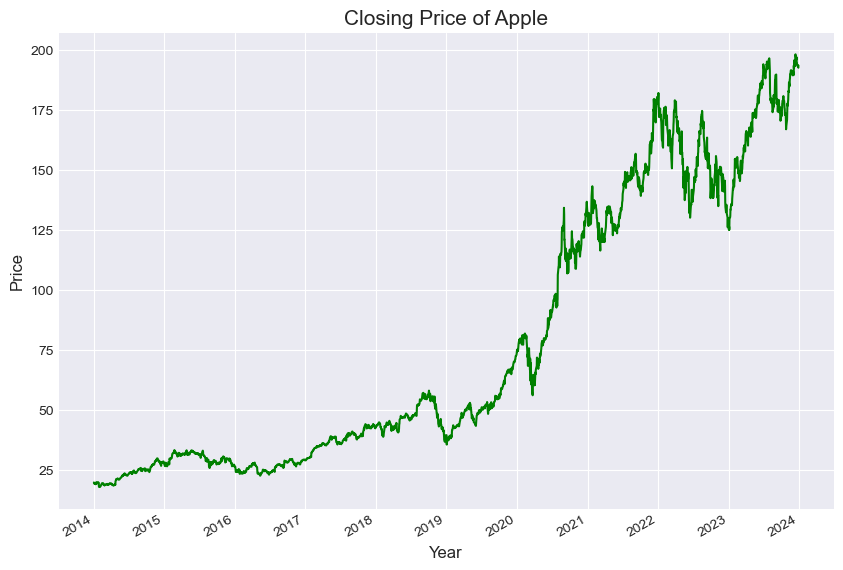

In [22]:
plt.style.use('seaborn-darkgrid')
df['close'].plot(figsize=(10, 7), color = 'green')
plt.title('Closing Price of Apple', fontsize = 15)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.show()

### Plot Volume

/var/folders/pq/t5rg1tbx2vx1zylhwbjrt66r0000gn/T/ipykernel_2050/2528019085.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


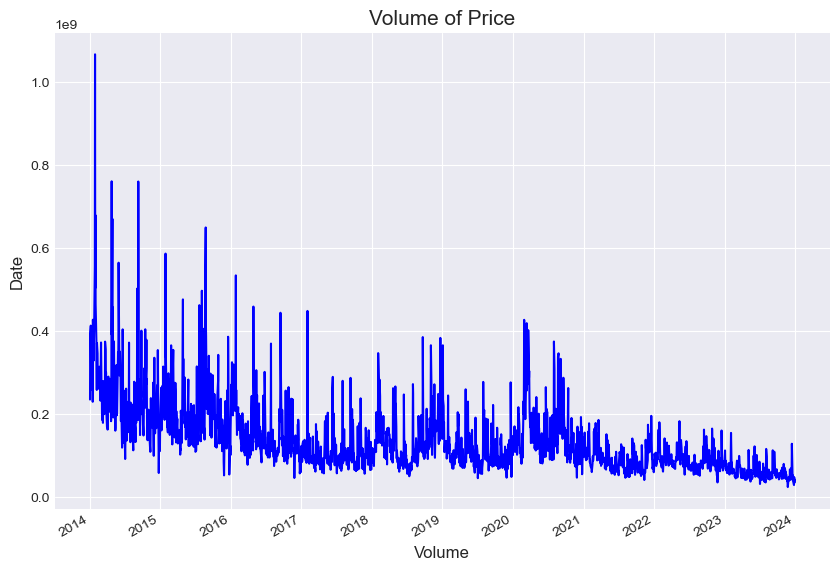

In [25]:
plt.style.use('seaborn-darkgrid')
df['volume'].plot(figsize = (10, 7), color = 'blue')
plt.title('Volume of Price', fontsize = 15)
plt.xlabel('Volume', fontsize = 12)
plt.ylabel('Date', fontsize = 12)
plt.show()